In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#setting style
sns.set_theme(style='whitegrid',palette="pastel")

In [3]:
#reading and checking data
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
df.tail(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
#checking data types and null values null values
df.info()
print("\n\nNull Values")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Null Values


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#dealing with null values
df['Publisher'].replace(np.nan, 'No_Data', inplace=True)

#for now will represent missing values with 0
df['Year'].replace(np.nan, 0 , inplace=True)
df['Year'] = df['Year'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


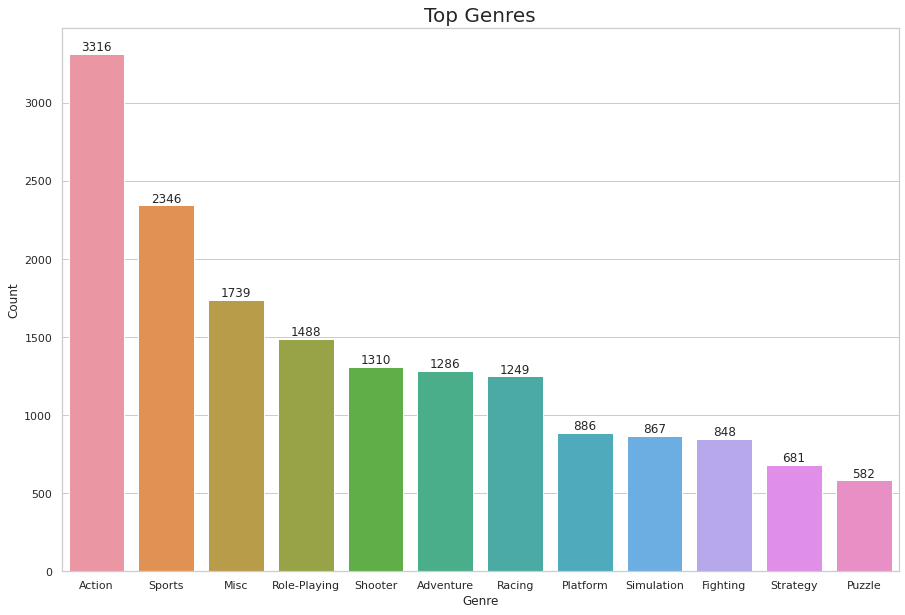

In [7]:
#plotting top Genres
#counting values
game = df['Genre'].value_counts().rename_axis('Genre').reset_index(name='Count')

#plotting
plt.figure(figsize=(15,10))
ax = sns.barplot(x=game['Genre'], 
                 y=game['Count'],
                 data=game)


for i in ax.containers:
    ax.bar_label(i,)
    
plt.title("Top Genres", fontsize=20)
plt.show()


The most famouse Genre is ***Action*** followed by ***Sports*** and ***Misc***

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


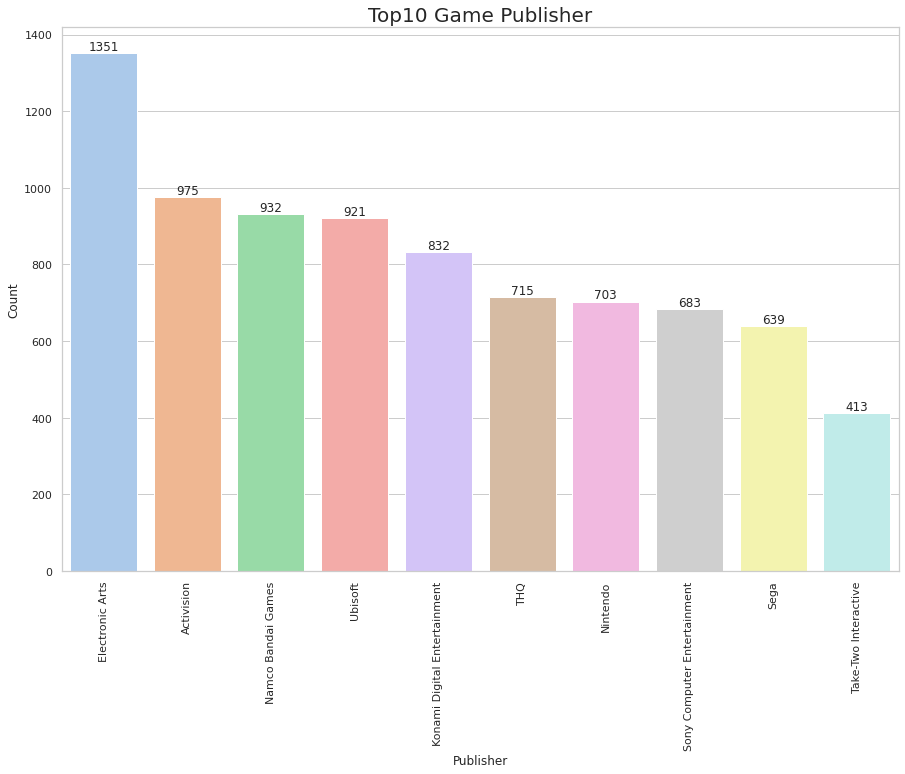

In [8]:
#plotting top10 Publisher
#counting values and making dataframe out of it
pub = df['Publisher'].value_counts().rename_axis('Publisher').reset_index(name="Count")
pub1 = pub.head(10).copy()

#plotting
plt.figure(figsize=(15,10))
ax = sns.barplot('Publisher', 
                 'Count',
                  data=pub1,)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.xticks(rotation=90)

plt.title("Top10 Game Publisher", fontsize=20)
plt.show()


***EA*** has published most ammout of games (1355 total) followed by ***Activision*** and ***Namco Bandal Games***

In [9]:
#counting values for year and plotting
yea = df['Year'].value_counts(ascending=False).rename_axis('Year').sort_index().reset_index(name="Count")
#droping first row because it represents missing values
year = yea.iloc[1:]
#aternative way
#df.drop(index=df.index[0], axis=0, inplace=True)

#plotting games published per year
plt.figure(figsize=(10,15))
# ax = sns.stripplot(data=year, x='Year', y="Count", hue='Year',)

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>